# Week 7
# An Introduction to Python Plotting Tools

Making informative visualizations of data is one of the most important tasks in data analysis.
- Learn the distribution of data
- Explore trends and patterns in data
- Identify outliers
- Generate ideas for modeling
- Present your findings

Today, we will study how to create several most frequently-used types of plots in Python.
- Scatter plots
- Bar plots
- Histograms
- Pie plots
- Box plots

Readings:
- Textbook Chapter 8

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Scatter Plots
A **scatter plot** uses dots to represent values for two numerical variables. The position of each dot represents an instance of data. Scatter plots are helpful for identifying relationships between variables.

In [3]:
# A simple example of scatter plots
# Source: https://www.who.int/growthref/hfa_boys_5_19years_z.pdf?ua=1
heights_boys = pd.DataFrame({'Age': range(5, 20),
                   'Height': [110, 116, 122, 127, 133, 137, 143, 149, 156, 163, 169, 173, 175, 176, 176.5]})
heights_boys

,Age,Height
0,5,110.0
1,6,116.0
2,7,122.0
3,8,127.0
4,9,133.0
5,10,137.0
6,11,143.0
7,12,149.0
8,13,156.0
9,14,163.0


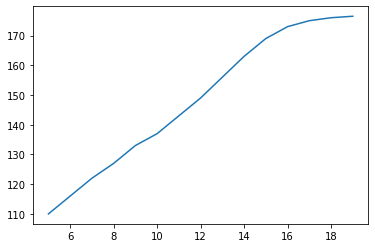

In [4]:
# Plot Age vs. Heights
plt.plot(heights_boys['Age'], heights_boys['Height'])

Text(0, 0.5, 'Height (cm)')

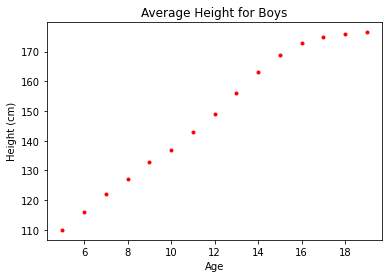

In [20]:
# Add descriptions to the figure
plt.plot(heights_boys['Age'], heights_boys['Height'], 'r.') 
# r means red color, . means using a dot for each point
plt.title("Average Height for Boys")
plt.xlabel("Age")
plt.ylabel("Height (cm)")

In [21]:
# Multiple sequences of data
heights = pd.DataFrame({'Age': range(5, 20),
                        'BoyHeight': [110, 116, 122, 127, 133, 137, 143, 149, 156, 163, 169, 173, 175, 176, 176.5],
                        'GirlHeight': [109.6, 115, 121, 126.5, 132.5, 139, 145, 151, 156, 160, 161.7, 162.5, 162.8, 163, 163.2]})
heights

,Age,BoyHeight,GirlHeight
0,5,110.0,109.6
1,6,116.0,115.0
2,7,122.0,121.0
3,8,127.0,126.5
4,9,133.0,132.5
5,10,137.0,139.0
6,11,143.0,145.0
7,12,149.0,151.0
8,13,156.0,156.0
9,14,163.0,160.0


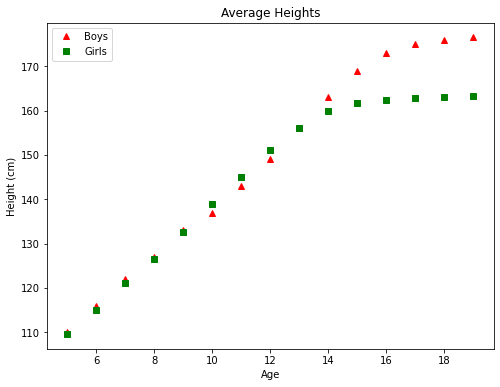

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(heights['Age'], heights['BoyHeight'], 'r^', label="Boys")
plt.plot(heights['Age'], heights['GirlHeight'], 'gs', label='Girls')
plt.title("Average Heights")
plt.xlabel("Age")
plt.ylabel("Height (cm)")
plt.legend()

**Q: What can we see from this plot?**
- Range?
- Trend?
- Comparison?

In [27]:
# Calculate a numerical statistic called "correlation coefficient"
heights.corr()

,Age,BoyHeight,GirlHeight
Age,1.000000,0.989985,0.958659
BoyHeight,0.989985,1.000000,0.981390
GirlHeight,0.958659,0.981390,1.000000


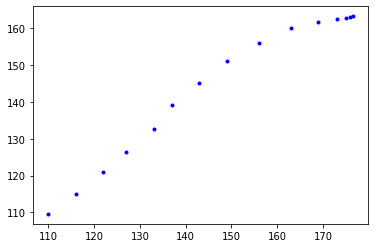

In [28]:
plt.plot(heights['BoyHeight'], heights['GirlHeight'], 'b.')

### Correlation Coefficient
The **correlation coefficient** is a numerical measurement of *linear* correlation between two variables.
- The value of correlation coefficient always lies in [-1, 1].
- If there is a strong positive correlation, then the coefficient is close to 1.
- If there is a strong negative correlation, then the coefficient is close to -1.
- If there is a very weak correlation, then the coefficient is close to 0.
- However, a near-zero coeffient may be caused by non-linear correlations.
![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

## Bar Plots

Bar plots are useful for presenting labeled data.

In [29]:
df = pd.DataFrame([[67, 76],
                   [78, 87],
                   [89, 98],
                   [90, 95]],
                  index=['Alice', 'Bob', 'Clare', 'David'],
                  columns=['Midterm', 'Final'])
df

,Midterm,Final
Alice,67,76
Bob,78,87
Clare,89,98
David,90,95


<AxesSubplot:>

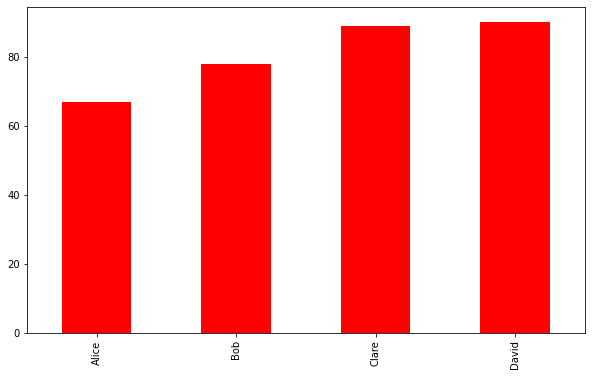

In [30]:
df['Midterm'].plot.bar(color='r', figsize=(10, 6))

<AxesSubplot:>

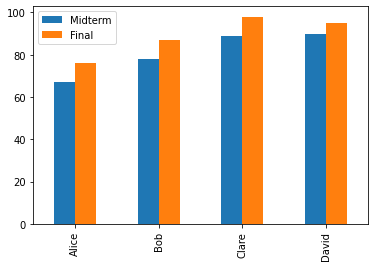

In [31]:
df[['Midterm', 'Final']].plot.bar()

In [32]:
df['Midterm', 'Final'].plot.bar() # MISTAKE: forget to put column names in a list

KeyError: ('Midterm', 'Final')

<AxesSubplot:>

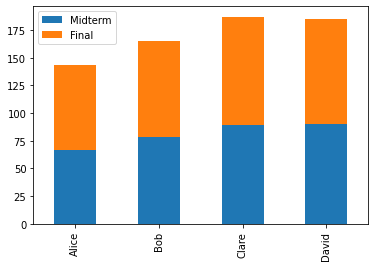

In [33]:
df[['Midterm', 'Final']].plot.bar(stacked=True)

<AxesSubplot:>

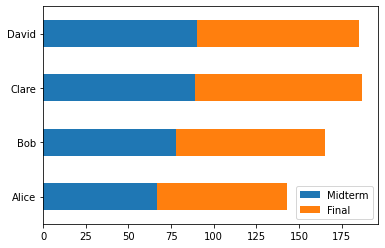

In [34]:
df[['Midterm', 'Final']].plot.barh(stacked=True)

## Histograms
**Histograms** are useful for showing the distribution of a variable
- Each bar cover a range of values.
- The height of each bar represents the number of data in the corresponding range.
- Boundary values are counted towards the left bar by convention.

In [42]:
# Generate 100 values using np.random.rand()
df = pd.DataFrame(np.random.rand(10000), columns=['Rand'])
df

,Rand
0,0.460006
1,0.049982
2,0.883037
3,0.936779
4,0.565762
...,...
9995,0.476715
9996,0.773435
9997,0.957931
9998,0.005453


<AxesSubplot:>

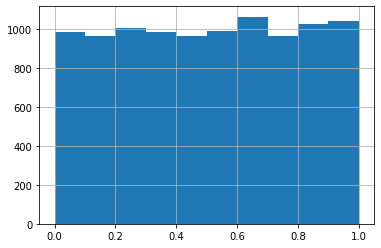

In [43]:
df['Rand'].hist() # Uniform distribution

In [44]:
# Add a column 'Randn' with values generated by np.random.randn()
df['Randn'] = np.random.randn(10000)
df

,Rand,Randn
0,0.460006,-0.700489
1,0.049982,-0.071709
2,0.883037,-0.929627
3,0.936779,0.206125
4,0.565762,-1.318229
...,...,...
9995,0.476715,1.410831
9996,0.773435,0.299419
9997,0.957931,1.716840
9998,0.005453,0.373930


<AxesSubplot:ylabel='Frequency'>

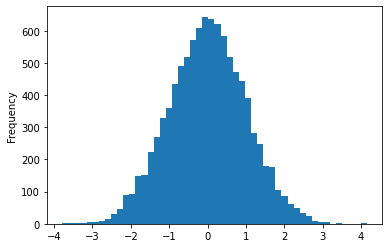

In [49]:
# df['Randn'].hist()
df['Randn'].plot.hist(bins=50) # Normal distribution (Gaussian distribution)

<AxesSubplot:ylabel='Frequency'>

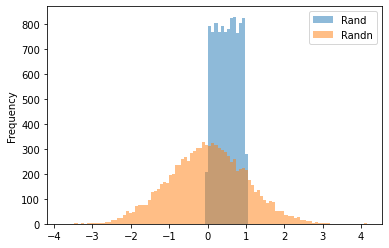

In [54]:
df[['Rand', 'Randn']].plot.hist(alpha=0.5, bins=100)

## Pie Plots

**Pie Plots** are useful for showing the proportion of values.

In [55]:
df = pd.DataFrame([5, 10, 20, 7, 3],
                  index=['A', 'B', 'C', 'D', 'F'],
                  columns=['Students'])
df

,Students
A,5
B,10
C,20
D,7
F,3


Text(0.5, 1.0, 'Grade Distribution')

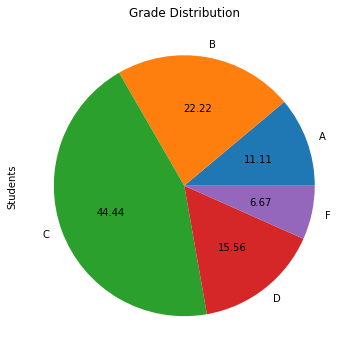

In [56]:
# df['Students'].plot.pie(autopct='%.2f', figsize=(6, 6))
df['Students'].plot.pie(autopct='%.2f', figsize=(6, 6))
plt.title("Grade Distribution")

## Box Plots

**Box plots** are used for depicting groups of numerical data through their quartiles

- Upper edge: 75% quartile (75% of data are below this value)
- Lower edge: 25% quartile (25% of data are below this value)
- Middle line: median value (50% of data are below this value)
- Upper bar: upper *interquartile range* (values above this bar are considered outliers)
- Lower bar: lower *interquartile range* (values below this bar are considered outliers)
- Dots: outliers

In [57]:
# Import the iris dataset
from sklearn import datasets
iris_raw = datasets.load_iris()
iris_raw

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

<img src="https://gadictos.com/wp-content/uploads/2019/03/iris-machinelearning-1060x397.png">

In [58]:
# Turn the data into a data frame
iris_df = pd.DataFrame(data=iris_raw['data'],
                       columns=iris_raw['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

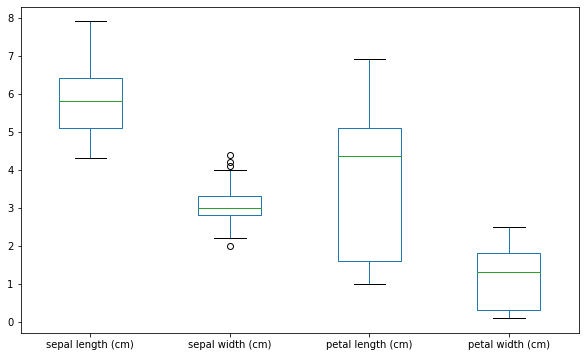

In [59]:
iris_df.plot.box(figsize=(10, 6))